In this notebook, I trained a convolutional neural network (CNN) using the mnist dataset to be able to predict numbers from 0-9.  The CNN model is then used in a web app that allows the user to draw a digit using their mouse and makes a prediction based on what the user draws.  You can access the project by [clicking this link](https://edwin-torres.github.io/github-page/#/projects/mnist).

In [ ]:
import tensorflowjs as tfjs
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import random

In [ ]:
# Loading Data
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

In [ ]:
# Selecting random Samples
index_list = random.choices(range(X_test.shape[0]), k = 25)

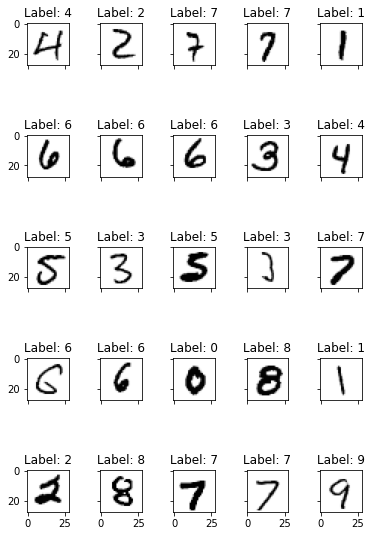

In [ ]:
# Displaying selected random samples and their labels
k = 0
fig, ax = plt.subplots(5, 5, sharex='col', sharey='row')
for i in range(5):
    for j in range(5):
        ax[i,j].imshow(X_test[index_list[k]], cmap='Greys')
        ax[i,j].set_title(f'Label: {y_test[index_list[k]]}')
        k = k + 1
plt.subplots_adjust(top=2, wspace = .75)
plt.show()


In [ ]:
# X_train and X_test Shape
print('X_train shape: ', X_train.shape)
print('X_test shape: ', X_test.shape)

X_train shape:  (60000, 28, 28)
X_test shape:  (10000, 28, 28)


In [ ]:
# there are 60000 images of size 28X28 pixels in the training set
# the input dimension should be Height X Width X Number of Channels
# in this case, we have 1 channel
# Desired input dimension is 28 X 28 X 1 and there are 60000 samples
# Reshaping to (60000,28,28,1)

train_images = X_train.reshape(60000, 28, 28, 1)

# Reshaping the testing images to (10000,28,28,1)
test_images = X_test.reshape(10000, 28, 28, 1)

In [ ]:
# Normalizing pixel values
train_images = train_images/255.0
test_images = test_images/255.0

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D

In [ ]:
model = Sequential()
model.add(Conv2D(28, kernel_size=(3,3), input_shape=(28, 28, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten()) 
model.add(Dense(128, activation=tf.nn.relu))
model.add(Dropout(0.2))
model.add(Dense(10,activation=tf.nn.softmax))

In [ ]:
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])
model.fit(x=train_images,y=y_train, epochs=10, batch_size=128)

Epoch 1/10
469/469 [==============================] - 11s 4ms/step - loss: 0.2703 - accuracy: 0.9209
Epoch 2/10
469/469 [==============================] - 2s 4ms/step - loss: 0.1034 - accuracy: 0.9692
Epoch 3/10
469/469 [==============================] - 2s 4ms/step - loss: 0.0682 - accuracy: 0.9797
Epoch 4/10
469/469 [==============================] - 2s 4ms/step - loss: 0.0535 - accuracy: 0.9835
Epoch 5/10
469/469 [==============================] - 2s 4ms/step - loss: 0.0411 - accuracy: 0.9871
Epoch 6/10
469/469 [==============================] - 2s 4ms/step - loss: 0.0330 - accuracy: 0.9899
Epoch 7/10
469/469 [==============================] - 2s 4ms/step - loss: 0.0277 - accuracy: 0.9911
Epoch 8/10
469/469 [==============================] - 3s 6ms/step - loss: 0.0233 - accuracy: 0.9923
Epoch 9/10
469/469 [==============================] - 2s 5ms/step - loss: 0.0220 - accuracy: 0.9929
Epoch 10/10
469/469 [==============================] - 2s 5ms/step - loss: 0.0171 - accuracy: 0.994

In [ ]:
# Evaluation
score = model.evaluate(test_images, y_test)
print('Accuracy: ', score[1])

313/313 [==============================] - 1s 3ms/step - loss: 0.0465 - accuracy: 0.9871
Accuracy:  0.9871000051498413


In [ ]:
# Making Predictions
y_pred = model.predict(test_images)

313/313 [==============================] - 1s 2ms/step


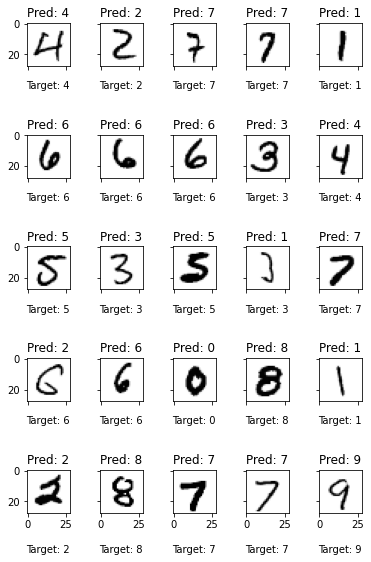

In [ ]:
# Displaying selected random samples with their predictions
k = 0
fig, ax = plt.subplots(5, 5, sharex='col', sharey='row')
for i in range(5):
    for j in range(5):
        ax[i,j].imshow(X_test[index_list[k]], cmap='Greys')
        ax[i,j].set_title(f'Pred: {np.argmax(y_pred[[index_list[k]]])}')
        ax[i,j].set_xlabel(f'Target: {y_test[index_list[k]]}', labelpad = 15)
        k = k + 1
plt.subplots_adjust(top=2, wspace = .7 )
plt.show()


In [ ]:
# Saving model for deployment
tfjs.converters.save_keras_model(model,"/content/")